In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math
from numpy.linalg import inv
from IPython.display import Image

In [6]:
n_power = 6.0
dm_mass = 1.0 #GeV
l=2500
#step = 6e-13 * pow(dm_mass,1.25)

In [30]:
#stepsize = [step*0.5, step, step*2]
stepsize = [0.5e-6,1e-6, 2e-6, 4e-6, 8e-6, 16e-6, 32e-6, 64e-6, 2*64e-6,4*64e-6]

#[2.5e-13, 5e-13, 1e-12, 2.5e-12, 5e-12, 1e-11,2.5e-11, 5e-11]

print(stepsize)
print(len(stepsize))

[5e-07, 1e-06, 2e-06, 4e-06, 8e-06, 1.6e-05, 3.2e-05, 6.4e-05, 0.000128, 0.000256]
10


In [31]:
derivative_cl = []
derivative_norm = []

for x in stepsize:
    
    #Center:
    omega_b = 0.02222 
    omega_dmeff = 0.1197
    h = 0.6731
    A_s = 2.1974e-9
    n_s = 0.9655
    tau_reio = 0.078 
    sigma_dmeff = 0. 
    
    #Right:
    omega_b_right = 0.02222 
    omega_dmeff_right = 0.1197
    h_right = 0.6731
    A_s_right = 2.1974e-9
    n_s_right = 0.9655
    tau_reio_right = 0.078 
    sigma_dmeff_right = 0. + x

    #Left:
    omega_b_left = 0.02222 
    omega_dmeff_left = 0.1197
    h_left = 0.6731
    A_s_left = 2.1974e-9
    n_s_left = 0.9655
    tau_reio_left = 0.078
    sigma_dmeff_left = 0.
    
    params_right = {'output': 'tCl pCl','l_max_scalars': 2500,'omega_dmeff': omega_dmeff_right,'h': h_right,'omega_b': omega_b_right,'A_s': A_s_right,'n_s': n_s_right,'tau_reio': tau_reio_right,'omega_cdm' : 1.0e-10,'m_dmeff': dm_mass,'npow_dmeff': n_power,'sigma_dmeff':sigma_dmeff_right}
    params_left = {'output': 'tCl pCl','l_max_scalars': 2500,'omega_dmeff': omega_dmeff_left,'h': h_left,'omega_b': omega_b_left,'A_s': A_s_left,'n_s': n_s_left,'tau_reio': tau_reio_left,'omega_cdm' : 1.0e-10,'m_dmeff': dm_mass,'npow_dmeff': n_power,'sigma_dmeff': sigma_dmeff_left}
    params_center = {'output': 'tCl pCl','l_max_scalars': 2500,'omega_dmeff': omega_dmeff,'h': h,'omega_b': omega_b,'A_s': A_s,'n_s': n_s,'tau_reio': tau_reio,'omega_cdm' : 1.0e-10,'m_dmeff': dm_mass,'npow_dmeff': n_power,'sigma_dmeff': sigma_dmeff}
    
    # Computing Cl_TT for the above parameters in class:
    Mright = Class()
    Mright.set(params_right)
    Mright.compute()
    cl_tot_right = Mright.raw_cl(2500)
    Mright.struct_cleanup()
    Mright.empty()
    cl_TT_right = cl_tot_right['tt']
    ell_right = cl_tot_right['ell']

    Mleft = Class()
    Mleft.set(params_left)
    Mleft.compute()
    cl_tot_left = Mleft.raw_cl(2500)
    Mleft.struct_cleanup()
    Mleft.empty()
    cl_TT_left = cl_tot_left['tt']
    ell = cl_tot_left['ell']
    
    M = Class()
    M.set(params_center)
    M.compute()
    cl_tot = M.raw_cl(2500)
    M.struct_cleanup()
    M.empty()
    cl_TT = cl_tot['tt']
    ell = cl_tot['ell']
    
    fiducial_norm = ((cl_TT_right - cl_TT_left) / (x)) /cl_TT
    derivative_norm.append(fiducial_norm)
    
    derivative = [(cl_TT_right[l] - cl_TT_left[l]) / (x)]
    derivative_cl.append(derivative)
    

<ipython-input-31-75f7b4529a13>:65: RuntimeWarning: invalid value encountered in true_divide
  fiducial_norm = ((cl_TT_right - cl_TT_left) / (x)) /cl_TT


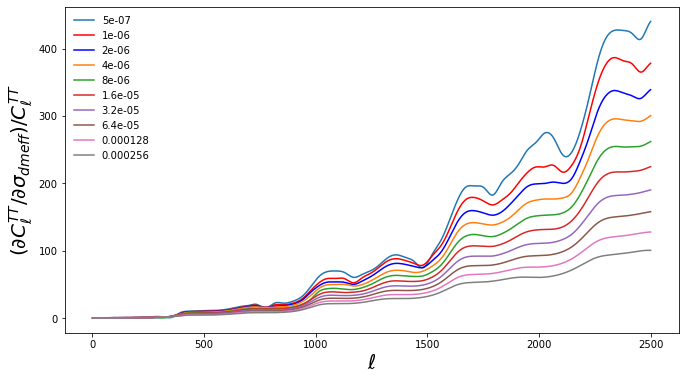

In [32]:
fig, ax = plt.subplots(figsize=(11, 6))

plt.plot(ell, derivative_norm[0],label=stepsize[0])
plt.plot(ell, derivative_norm[1],'r-',label=stepsize[1])
plt.plot(ell, derivative_norm[2],'b-',label=stepsize[2])
plt.plot(ell, derivative_norm[3],label=stepsize[3])
plt.plot(ell, derivative_norm[4],label=stepsize[4])
plt.plot(ell, derivative_norm[5],label=stepsize[5])
plt.plot(ell, derivative_norm[6],label=stepsize[6])
plt.plot(ell, derivative_norm[7],label=stepsize[7])
plt.plot(ell, derivative_norm[8],label=stepsize[8])
plt.plot(ell, derivative_norm[9],label=stepsize[9])
#plt.plot(ell, derivative_norm[10],label=stepsize[10])
#plt.plot(ell, derivative_norm[11],label=stepsize[11])
#plt.plot(ell, derivative_norm[12],label=stepsize[12])


plt.ylabel(r'$(\partial C_{\ell}^{TT} / \partial \sigma_{dmeff}) / C_{\ell}^{TT}$',size=20)
plt.xlabel(r'$\ell$',size=20)
plt.legend(loc='upper left', frameon=False)

plt.show()
#fig.savefig("derivative_vs_stepsize_1Gev_n=4.png") 

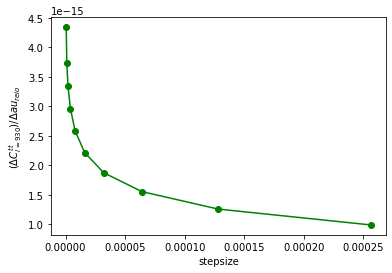

In [33]:
plt.plot(stepsize, derivative_cl,'go-',)
plt.ylabel("$(\Delta C_{l=930}^{tt})/ \Delta \tau_{reio}$")
#plt.ylim([5e-15, 7e-15])
plt.xlabel("stepsize")
#plt.title("$\Delta C_{l=930}$ vs. stepsize for $\tau_{reio} $")
plt.show()
#fig.savefig("convergence-Omega_cdm.png") 


In [34]:
print(derivative_cl)
print(stepsize)

[[4.338147034208698e-15], [3.7258729023785144e-15], [3.3396450611526006e-15], [2.9611857012945613e-15], [2.5810187702897708e-15], [2.214236181752181e-15], [1.8724314545035344e-15], [1.5539936499911273e-15], [1.2576851449732933e-15], [9.89141660578582e-16]]
[5e-07, 1e-06, 2e-06, 4e-06, 8e-06, 1.6e-05, 3.2e-05, 6.4e-05, 0.000128, 0.000256]


In [35]:
for i in range(len(derivative_cl)-1):
    print(100*np.absolute((derivative_cl[i][0] - derivative_cl[i+1][0])/derivative_cl[i+1][0]))

16.43303858914031
11.564936816747116
12.780669570725866
14.729336159074471
16.564745511806496
18.254592253646706
20.491576945261347
23.559831822942137
27.149143049705472
